In [5]:
from ehyd_tools.design_rainfall import (get_rainfall_height, get_calculation_method, read_ehyd_design_rainfall,
                                        save_ehyd_design_rainfall_pdf, get_ehyd_design_rainfall_file,
                                        get_ehyd_design_rainfall, get_max_calculation_method)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
grid_point_number=5214

In [18]:
file = get_ehyd_design_rainfall_file(grid_point_number)
file

<_io.TextIOWrapper encoding='ISO-8859-1'>

In [8]:
# save_ehyd_design_rainfall_pdf(grid_point_number, fn='new.pdf')

In [19]:
df = read_ehyd_design_rainfall(file)
df.head(3)

return period                1     2     3     5     10    20    25    30   \
duration calculation method                                                  
5        MaxModN             8.8  10.4  11.7  13.4  15.8  18.2  18.9  19.6   
         Bemessung           8.6  10.2  11.3  12.7  14.7  16.7  17.4  18.0   
         ÖKOSTRA             8.4   9.9  10.8  11.9  13.4  14.9  15.5  15.9   

return period                 50    75    100  
duration calculation method                    
5        MaxModN             21.3  22.7  23.7  
         Bemessung           19.4  20.6  21.4  
         ÖKOSTRA             17.0  17.9  18.5

In [20]:
df = get_ehyd_design_rainfall(grid_point_number)
df.head(3)


return period                1     2     3     5     10    20    25    30   \
duration calculation method                                                  
5        MaxModN             8.8  10.4  11.7  13.4  15.8  18.2  18.9  19.6   
         Bemessung           8.6  10.2  11.3  12.7  14.7  16.7  17.4  18.0   
         ÖKOSTRA             8.4   9.9  10.8  11.9  13.4  14.9  15.5  15.9   

return period                 50    75    100  
duration calculation method                    
5        MaxModN             21.3  22.7  23.7  
         Bemessung           19.4  20.6  21.4  
         ÖKOSTRA             17.0  17.9  18.5

In [21]:
get_calculation_method(df, method='ÖKOSTRA').head(3)

return period,1,2,3,5,10,20,25,30,50,75,100
duration,,,,,,,,,,,
5,8.4,9.9,10.8,11.9,13.4,14.9,15.5,15.9,17.0,17.9,18.5
10,13.4,15.9,17.3,19.2,21.7,24.3,24.9,25.6,27.5,29.1,30.1
15,16.8,20.0,21.9,24.3,27.6,30.7,31.8,32.7,35.0,37.0,38.4


In [22]:
get_calculation_method(df, method='Bemessung').head(3)

return period,1,2,3,5,10,20,25,30,50,75,100
duration,,,,,,,,,,,
5,8.6,10.2,11.3,12.7,14.7,16.7,17.4,18.0,19.4,20.6,21.4
10,13.7,16.3,17.8,19.7,23.3,26.8,27.8,28.8,31.4,33.5,35.0
15,17.2,20.5,22.4,24.9,29.1,33.5,35.0,36.2,39.5,42.2,44.1


In [24]:
rain_height = get_max_calculation_method(df)
rain_height.head(3)


return period,1,2,3,5,10,20,25,30,50,75,100
duration,,,,,,,,,,,
5,8.6,10.2,11.3,12.7,14.7,16.7,17.4,18.0,19.4,20.6,21.4
10,13.7,16.3,17.8,19.7,23.3,26.8,27.8,28.8,31.4,33.5,35.0
15,17.2,20.5,22.4,24.9,29.1,33.5,35.0,36.2,39.5,42.2,44.1


In [23]:
get_rainfall_height(rain_height, return_period=5, duration=720)


73.6

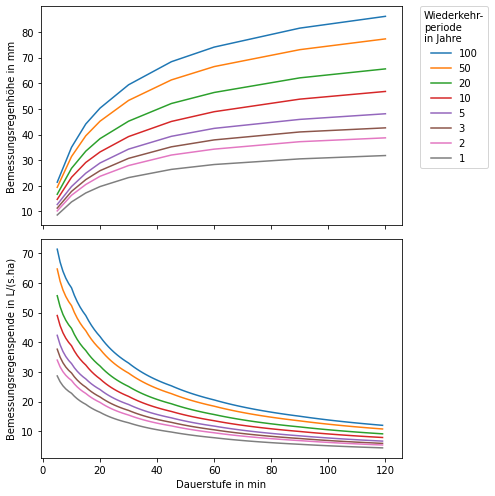

In [25]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)  # type: plt.Figure, (plt.Axes, plt.Axes)

duration_max = 120
return_periods = [1, 2, 3, 5, 10, 20, 50, 100][::-1]

rain_height.columns.name = 'Wiederkehr-\nperiode\nin Jahre'
ax = rain_height.loc[:duration_max, return_periods].plot(ax=ax1)
ax.set_xlabel('Dauerstufe in min')
ax.set_ylabel('Bemessungsregenhöhe in mm')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Wiederkehr-\nperiode\nin Jahre')

# rain_flow_rate = rain_height.div(rain_height.index.to_series(), axis=0) * 1000 / 60
durations = np.arange(5, duration_max, 1)
rain_flow_rate = pd.DataFrame(index=durations)
for tn in rain_height:
    # get_rainfall_height(rain_height, tn, durations)

    rain_flow_rate[tn] = np.interp(durations, rain_height.index.values, rain_height[tn]) / durations * 1000 / 60

ax = rain_flow_rate.loc[:duration_max, return_periods].plot(ax=ax2)
ax.set_xlabel('Dauerstufe in min')
ax.set_ylabel('Bemessungsregenspende in L/(s.ha)')

ax.legend().remove()

fig.set_size_inches(7, 7)
fig.tight_layout()